In [3]:
import torch

## Tensors
At its core, PyTorch is a library for processing tensors. A tensor is a number, vector, matrix, or any n-dimensional array. Let's create a tensor with a single number.
 > **Note** that it's not possible to create tensors with an improper shape.



**CLASS torch.Tensor**

There are a few main ways to create a tensor, depending on your use case.

  - To create a tensor with pre-existing data, use `torch.tensor()`.

  - To create a tensor with specific size, use `torch.*` tensor creation ops (see Creation Ops).

  - To create a tensor with the same size (and similar types) as another tensor, use `torch.*_like tensor` creation ops (see Creation Ops).

  - To create a tensor with similar type but different size as another tensor, use `tensor.new_*` creation ops.

In [2]:
# Number
t1 = torch.tensor(4.)
t5 = torch.tensor([[5., 6, 11], 
                   [7, 8], 
                   [9, 10]])
ts

ValueError: ignored

*We've created three tensors: `x`, `w`, and `b`, all numbers. w and b have an additional parameter requires_grad set to True. We'll see what it does in just a moment.*



In [3]:
# Create tensors.
x = torch.tensor(3.)
w = torch.tensor(4., requires_grad=True)
b = torch.tensor(5., requires_grad=True)
x * w + b

tensor(17., grad_fn=<AddBackward0>)

> **`requires_grad` tells torch that x value will be used to evaluate functions**


In [4]:
y = w * x + b
y

tensor(17., grad_fn=<AddBackward0>)

  As expected, `y` is a tensor with the value 3 * 4 + 5 = 17. What makes PyTorch unique is that we can automatically **compute the derivative of y** w.r.t. the tensors that have requires_grad set to True i.e. w and b. This feature of PyTorch is called **autograd** (automatic gradients).



In [5]:
# To compute the derivatives, we can invoke the .backward method on our result y
# Backward function Calculates the derivative of y wrt. to x
y.backward()
y

tensor(17., grad_fn=<AddBackward0>)

*The derivatives of y with respect to the input tensors are stored in the `.grad` property of the respective tensors.*



In [6]:
# Display gradients
# Backward function Calculates the derivative of y wrt. to x
print('dy/dx:', x.grad)
print('dy/dw:', w.grad)
print('dy/db:', b.grad)

dy/dx: None
dy/dw: tensor(3.)
dy/db: tensor(1.)


In [4]:
x = torch.tensor(2, requires_grad=True, dtype=float)
z = x**2 + 2*x + 1 # ----->  2x + 2
z.backward()
print(x.grad)

tensor(6., dtype=torch.float64)


In [5]:

#Partial Derivatives
u = torch.tensor(1, requires_grad=True, dtype=float)
v = torch.tensor(2, requires_grad=True, dtype=float)
f = u*v + u**2
f.backward()
print(u.grad)
print(v.grad)

tensor(4., dtype=torch.float64)
tensor(1., dtype=torch.float64)


Instead of reinventing the wheel, PyTorch interoperates well with Numpy to leverage its existing ecosystem of tools and libraries.

We can convert a Numpy array to a PyTorch tensor using `torch.from_numpy`.



In [7]:
import numpy as np

x = np.array([[1, 2], [3, 4.]])
y = torch.from_numpy(x)
x, y

(array([[1., 2.],
        [3., 4.]]), tensor([[1., 2.],
         [3., 4.]], dtype=torch.float64))

We can convert a PyTorch tensor to a Numpy array using the `.numpy` method of a tensor.



In [8]:
# Convert a torch tensor to a numpy array
z = y.numpy()
z

array([[1., 2.],
       [3., 4.]])

Use `torch.Tensor.item()` to get a Python number from a tensor containing a single value:



In [12]:
x = torch.tensor([[1]])
x.item()

1

> **Note** : `.item()` only one element tensors can be converted to Python its scalars

In [11]:
y.item()

ValueError: ignored

A tensor can be created with `requires_grad=True` so that torch.autograd records operations on them for automatic differentiation.

In [14]:
x = torch.tensor([[1., -1.], [1., 1.]]) , #requires_grad=True)
out = x.pow(2).sum()
out.backward()
x.grad

RuntimeError: ignored

> `new_zeros(size, dtype=None, device=None, requires_grad=False) → Tensor`

   Returns a Tensor of size size filled with 0. By default, the returned Tensor has the same torch.dtype and torch.device as this tensor

**Parameters**
  
- size (int...) – a list, tuple, or torch.Size of integers defining the shape of the output tensor.

- dtype (torch.dtype, optional) – the desired type of returned tensor. Default: if None, same torch.dtype as this tensor.

- device (torch.device, optional) – the desired device of returned tensor. Default: if None, same torch.device as this tensor.

- requires_grad (bool, optional) – If autograd should record operations on the returned tensor. Default: False.

In [15]:
tensor = torch.tensor((), dtype=torch.float64)
tensor.new_zeros((2, 3))

tensor([[0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float64)

In [16]:
X = torch.randn(4, dtype=torch.cfloat)
X

tensor([ 0.0282-0.5626j, -0.3077+0.1036j,  0.3809-1.4568j, -0.2048-1.1163j])

real() is only supported for tensors with complex dtypes.



**Referances**

  - [PyTorch docs about Tensor](https://pytorch.org/docs/stable/tensors.html)

## 1_D Tensors exercise

The dtype of tensor object after converting it to tensor:  torch.int64
The type of tensor object after converting it to tensor:  torch.LongTensor


C:\Users\Dana\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


The type of the new_float_tensor: torch.FloatTensor
The type of the new_float_tensor: torch.FloatTensor
The size of the new_float_tensor:  torch.Size([5])
The dimension of the new_float_tensor:  1
Original Size:  tensor([0., 1., 2., 3., 4.])
Size after view method tensor([[0.],
        [1.],
        [2.],
        [3.],
        [4.]])
Size after view method torch.Size([5, 1])
Size after view method 2
Original Size:  tensor([0., 1., 2., 3., 4.])
Size after view method tensor([[0.],
        [1.],
        [2.],
        [3.],
        [4.]])
The dtype of new tensor:  torch.float64
The type of new tensor:  torch.DoubleTensor
The numpy array from tensor:  [0. 1. 2. 3. 4.]
The dtype of numpy array:  float64
The new tensor points to numpy_array :  tensor([0., 0., 0., 0., 0.], dtype=torch.float64)
and back to numpy array points to the tensor:  [0. 0. 0. 0. 0.]
Original Size:  tensor([1, 2, 3, 4, 5])
Size after view method tensor([[1, 2, 3, 4, 5]])
Max value from tensor x =  tensor(1.5708)
Min val

C:\Users\Dana\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


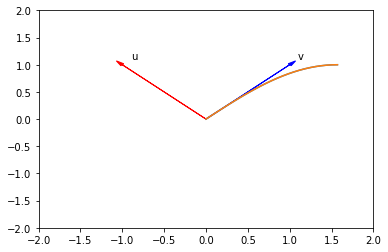

In [4]:

"""

1-D Tensors
Exercise




32-bit float -                          Float Tensor
64-bit float -                          Double Tensor
16-bit float -                          Half Tensor
8-bit int (unsigned)(8-bit images)-     Byte Tensor     
8-bit int (signed)-                     Char Tensor
16-bit int (singed)-                    Short Tensor
32-bit int (singed)-                    Int Tensor
64-bit int (signed)-                    Long Tensor


"""

import torch 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


#Lets define the function to plot vectors in coorindate system
def plotVec(vectors):
    ax = plt.axes()

# Vectors = [{"vector": vector variable, "name": name of vector, "color": color of the vector on diagram}]    
    #For loop for drawing vectors
    for vec in vectors:
        ax.arrow(0, 0, *vec["vector"], head_width = 0.05, color = vec["color"], head_length = 0.1)
        plt.text(*(vec["vector"] + 0.1), vec["name"])
    
    plt.ylim(-2, 2) #Setting limits for y-axis
    plt.xlim(-2, 2) #Setting limits for x-axis



# Convert a integer list with length 5 to a tensor

ints_to_tensor = torch.tensor([0, 1, 2, 3, 4])
print("The dtype of tensor object after converting it to tensor: ", ints_to_tensor.dtype)
print("The type of tensor object after converting it to tensor: ", ints_to_tensor.type())
type(ints_to_tensor)


#Convert float list to a float tensor 32bit
list_floats = [0.0, 1.0, 2.0, 3.0, 4.0]
list_floats = torch.tensor(list_floats)
list_floats.type()

#convert the float tensor to int64 Long Tensor
floats_int_tensor=torch.tensor(list_floats,dtype=torch.int64)
floats_int_tensor.type()


# Convert a integer list with length 5 to float tensor
new_float_tensor = torch.FloatTensor([0, 1, 2, 3, 4])
new_float_tensor.type()
print("The type of the new_float_tensor:", new_float_tensor.type())
new_float_tensor = torch.FloatTensor([0, 1, 2, 3, 4])

# Another method to convert the integer list to float tensor
old_int_tensor = torch.tensor([0, 1, 2, 3, 4])
new_float_tensor = old_int_tensor.type(torch.FloatTensor)
print("The type of the new_float_tensor:", new_float_tensor.type())


# Introduce the tensor_obj.size() & tensor_ndimension.size() methods
print("The size of the new_float_tensor: ", new_float_tensor.size())
print("The dimension of the new_float_tensor: ",new_float_tensor.ndimension())


'''
The tensor_obj.view(row, column) is used for reshaping a tensor object.

What if you have a tensor object with torch.Size([5]) as a new_float_tensor as shown in the previous example?
After you execute new_float_tensor.view(5, 1), the size of new_float_tensor will be torch.Size([5, 1]).
This means that the tensor object new_float_tensor has been reshaped from 
a one-dimensional tensor object with 5 elements to a two-dimensional tensor object with 5 rows and 1 column.

'''

# Introduce the tensor_obj.view(row, column) method
twoD_float_tensor = new_float_tensor.view(5, 1)
print("Original Size: ", new_float_tensor)
print("Size after view method", twoD_float_tensor)
print("Size after view method", twoD_float_tensor.size()) #Tensor of size (5,1)
print("Size after view method", twoD_float_tensor.ndimension()) #Tensor dimension is now 2

#What if you have a tensor with dynamic size but you want to reshape it? You can use -1 to do just that.
# Introduce the use of -1 in tensor_obj.view(row, column) method
twoD_float_tensor = new_float_tensor.view(-1, 1)
print("Original Size: ", new_float_tensor)
print("Size after view method", twoD_float_tensor)

# Convert a numpy array to a tensor
numpy_array = np.array([0.0, 1.0, 2.0, 3.0, 4.0])
new_tensor = torch.from_numpy(numpy_array)
print("The dtype of new tensor: ", new_tensor.dtype)
print("The type of new tensor: ", new_tensor.type())

# Convert a tensor to a numpy array
back_to_numpy = new_tensor.numpy()
print("The numpy array from tensor: ", back_to_numpy)
print("The dtype of numpy array: ", back_to_numpy.dtype)

# Set all elements in numpy array to zero 
numpy_array[:] = 0
print("The new tensor points to numpy_array : ", new_tensor)
print("and back to numpy array points to the tensor: ", back_to_numpy)


#Converting a tensor to (1,5) tensor
your_tensor = torch.tensor([1, 2, 3, 4, 5])
your_tensor.size()
your_new_tensor = your_tensor.view(1, 5)
your_new_tensor.ndimension()
print("Original Size: ", your_tensor)
print("Size after view method", your_new_tensor)



import matplotlib.pyplot as plt

#Constructing tensor with 25 steps in the range of 0 and pi/2.
x = torch.linspace(0, np.pi/2, steps=25)
y = torch.sin(x)


plt.plot(x.numpy(), y.numpy()) #We need to convert tensors to numpy arrays




plt.plot(x.numpy(), y.numpy())

print("Max value from tensor x = ", x.max())
print("Min value from tensor x = ", x.min())

#Convert the list [-1, 1] and [1, 1] to tensors u and v. 
#Plot the tensor u and v as a vector by using the function plotVec and find the dot product

u = torch.tensor([-1, 1])
v = torch.tensor([1, 1])
z = torch.dot(u,v)
print("Dot product of tensors u and v = ", np.dot(u,v))


plotVec([
    {"vector": u.numpy(), "name": 'u', "color": 'r'},
    {"vector": v.numpy(), "name": 'v', "color": 'b'}
])



## 2_D Tensors exercise

In [5]:

"""

2-D Tensors
Exercise




32-bit float -                          Float Tensor
64-bit float -                          Double Tensor
16-bit float -                          Half Tensor
8-bit int (unsigned)(8-bit images)-     Byte Tensor     
8-bit int (signed)-                     Char Tensor
16-bit int (singed)-                    Short Tensor
32-bit int (singed)-                    Int Tensor
64-bit int (signed)-                    Long Tensor


"""

import numpy as np 
import matplotlib.pyplot as plt
import torch
import pandas as pd

#Creating 2D tensor from a list
twoD_list = [[11, 12, 13], [21, 22, 23], [31, 32, 33]]
twoD_tensor = torch.tensor(twoD_list)
print("The New 2D Tensor: ", twoD_tensor)

#Converting tensor to numpy array and back to tensor
twoD_numpy = twoD_tensor.numpy()
print("Tensor -> Numpy Array:")
print("The numpy array after converting: ", twoD_numpy)
print("Type after converting: ", twoD_numpy.dtype)

new_twoD_tensor = torch.from_numpy(twoD_numpy)
print("Numpy Array -> Tensor:")
print("The tensor after converting:", new_twoD_tensor)
print("Type after converting: ", new_twoD_tensor.dtype)

#Lets convert panadas dataframe to a tenosr
df = pd.DataFrame({'a':[11,21,31],'b':[12,22,312]})

print("Pandas Dataframe to numpy: ", df.values)
print("Type BEFORE converting: ", df.values.dtype)


new_tensor = torch.from_numpy(df.values)
print("Tensor AFTER converting: ", new_tensor)
print("Type AFTER converting: ", new_tensor.dtype)

#Lets convert a Pandas Series to a tensor
df = pd.DataFrame({'A':[11, 33, 22],'B':[3, 3, 2]})
pandas_to_numpy = df.values
numpy_to_tensor = torch.tensor(pandas_to_numpy)
numpy_to_tensor



#Slicing rows
tensor_example = torch.tensor([[11, 12, 13], [21, 22, 23], [31, 32, 33]])
sliced_tensor_example = tensor_example[1:3] #Slicing 2nd and 3rd row
print("Result after tensor_example[1:3]: ", sliced_tensor_example)
print("Dimension after tensor_example[1:3]: ", sliced_tensor_example.ndimension())

#Dimension of 2nd row of sliced tensor
print("Result after sliced_tensor_example[1]: ", sliced_tensor_example[1])
print("Dimension after sliced_tensor_example[1]: ", sliced_tensor_example[1].ndimension())

#Lets try to get the values in row 2 and 3 in the second column. Note that the code below will not work.
print("Result: ", tensor_example[1:3][1])
tensor_example[1:3][1]
print("Dimension: ", tensor_example[1:3][1].ndimension()) #This gives dimension of 1

#In order to get the values in row 2 and 3 in the second column. we have to separate with a comma.
tensor_example[1:3, 1]


#Lets modify values in a 2D tensor.
tensor_ques = torch.tensor([[11, 12, 13], [21, 22, 23], [31, 32, 33]])
#We will modify the values in the second column of the second and 3rd row. 
tensor_ques[1:3, 1] = 0
tensor_ques

The New 2D Tensor:  tensor([[11, 12, 13],
        [21, 22, 23],
        [31, 32, 33]])
Tensor -> Numpy Array:
The numpy array after converting:  [[11 12 13]
 [21 22 23]
 [31 32 33]]
Type after converting:  int64
Numpy Array -> Tensor:
The tensor after converting: tensor([[11, 12, 13],
        [21, 22, 23],
        [31, 32, 33]])
Type after converting:  torch.int64
Pandas Dataframe to numpy:  [[ 11  12]
 [ 21  22]
 [ 31 312]]
Type BEFORE converting:  int64
Tensor AFTER converting:  tensor([[ 11,  12],
        [ 21,  22],
        [ 31, 312]])
Type AFTER converting:  torch.int64
Result after tensor_example[1:3]:  tensor([[21, 22, 23],
        [31, 32, 33]])
Dimension after tensor_example[1:3]:  2
Result after sliced_tensor_example[1]:  tensor([31, 32, 33])
Dimension after sliced_tensor_example[1]:  1
Result:  tensor([31, 32, 33])
Dimension:  1


tensor([[11, 12, 13],
        [21,  0, 23],
        [31,  0, 33]])

> [Torchvision.Transforms docs](https://pytorch.org/docs/stable/torchvision/transforms.html)

C:\Users\Dana\Desktop\PyTorch
File name: img/fashion0.png
class or y: Ankle boot


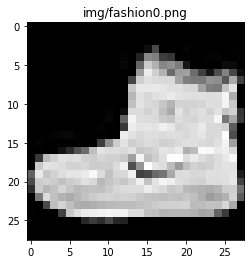

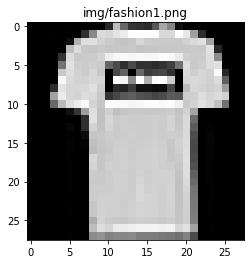

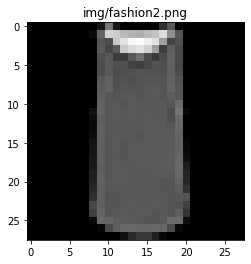

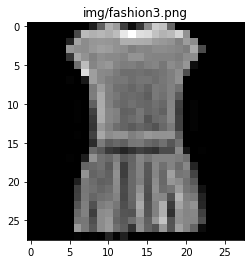

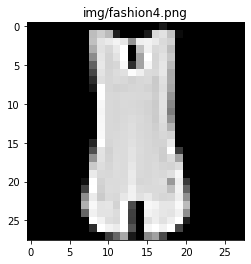

9920512it [00:06, 1502767.47it/s]                             


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw


32768it [00:00, 76339.41it/s]            


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw


1654784it [00:01, 914677.27it/s]                              


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw


8192it [00:00, 14787.73it/s]            


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw
Processing...


C:\Users\Dana\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


In [11]:
"""

Dataset for Images

"""

import torch
from PIL import Image
import pandas as pd
import os
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

#We will use MNIST dataset, 28x28x1 images
#The dataset has 10 labels or classes


dir_path = os.path.dirname(os.path.realpath('__file__'))
print(dir_path)

csv_file = 'index.csv'
csv_path = os.path.join(dir_path,csv_file)

data_name = pd.read_csv((csv_path))
data_name.head() #Lets view the dataframe

print('File name:', data_name.iloc[0,1])
print('class or y:', data_name.iloc[0,0])

for i in range(5): #Lets plot all the images in the imageset
    image_name = data_name.iloc[i,1] #we iterate through every image in the i'th row, 2nd column.
    image_path = os.path.join(dir_path,image_name) #We set the image path 
    image = Image.open(image_path) #We open the image from its path
    #Lets see the image
    plt.imshow(image, cmap = 'gray', vmin = 0, vmax = 255)
    plt.title(data_name.iloc[i,1])
    plt.show()
    

#Lets create a dataset class

class Dataset(Dataset):
    def __init__(self, csv_file, data_dir, transform = None):
        
        self.transform = transform
        self.data_dir = data_dir
        data_dircsv_file = os.path.join(self.data_dir,csv_file)
        self.data_name = pd.read_csv(data_dircsv_file)
        self.len = self.data_name.shape[0]
        
    def __lef__(self):
        return self.len
    
    def __getitem__(self, idx):
        
        img_name = os.path.join(self.data_dir, self.data_name.iloc[idx, 1])
        image = Image.open(img_name)
        
        y = self.data_name.iloc[idx, 0]
        
        if self.transform:
            image = self.transform(image)
            return image, y


#Lets use torchvision pre-built transforms for images
transforms.CenterCrop(20) #Lets crop the image to 20x20
transforms.ToTensor() #Converting the image to a tensor

#Or we can combine the transforms
#Lets compose the transforms
croptensor_data_transform = transforms.Compose([transforms.CenterCrop(20), transforms.ToTensor()])

#Now we apply the composed transforms to the dataset constructor
dataset = Dataset(csv_file = csv_file, data_dir = dir_path, transform = croptensor_data_transform)
dataset[0][0].shape #The dataset is 20x20x1



#Lets try a prebuilt dataset from torchvision
import torchvision.datasets as dsets

#We creat the dataset object
#Root is root directory of dataset, train parameter indicates if we want to use training or testing sets. 
#Download = True: downlaods the dataset into the directory. We set transform parameter to convert image to tensor.
dataset = dsets.MNIST(root = './data', train = False, download = True, transform = transforms.ToTensor)


## Differentiation

`torch.autograd` provides classes and functions implementing automatic differentiation of arbitrary scalar valued functions with ensor s for which gradients should be computed with the requires_grad=True

[PyTorch docs about torch.autograd](https://pytorch.org/docs/stable/autograd.html)

## PyTorch Autograd


On setting .requires_grad = True they start forming a backward graph that tracks every operation applied on them to calculate the gradients using something called a dynamic computation graph (DCG) 

[PyTorch Autograd](https://towardsdatascience.com/pytorch-autograd-understanding-the-heart-of-pytorchs-magic-2686cd94ec95)

## torch.autograd.backward
-------

- **Sytanx**: torch.autograd.backward(tensors: Union[torch.Tensor, Sequence[torch.Tensor]], grad_tensors: Union[torch.Tensor, Sequence[torch.Tensor], None] = None, retain_graph: Optional[bool] = None, create_graph: bool = False, grad_variables: Union[torch.Tensor, Sequence[torch.Tensor], None] = None) → None


- **Parameters** :
    - tensors (sequence of Tensor) – Tensors of which the derivative will be computed.

    - grad_tensors (sequence of (Tensor or None)) – The “vector” in the Jacobian-vector product, usually gradients w.r.t. each element of corresponding tensors. None values can be specified for scalar Tensors or ones that don’t require grad. If a None value would be acceptable for all grad_tensors, then this argument is optional.

    - retain_graph (bool, optional) – If False, the graph used to compute the grad will be freed. Note that in nearly all cases setting this option to True is not needed and often can be worked around in a much more efficient way. Defaults to the value of create_graph.

    - create_graph (bool, optional) – If True, graph of the derivative will be constructed, allowing to compute higher order derivative products. Defaults to False.

In [8]:
import torch
import numpy as np

x = torch.randn(2, 2, requires_grad = True)
# From numpy
x = np.array([1., 2., 3.]) #Only Tensors of floating point dtype can require gradients
x = torch.from_numpy(x)
# Now enable gradient 
x.requires_grad_(True)

tensor([1., 2., 3.], dtype=torch.float64, requires_grad=True)

> **above makes the change in-place (its a common pytorch thing)**

> *Note: By PyTorch’s design, gradients can only be calculated for floating point tensors which is why I’ve created a float type numpy array before making it a gradient enabled PyTorch tensor*

`ctx` is a context object that can be used to stash information 
for backward computation. You can cache arbitrary objects for 
use in the backward pass using the `ctx.save_for_backward` method

In [9]:
"""

Differentiation in Pytorch

"""

import torch
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

#Evaluation of derivatives in torch
x = torch.tensor(2, requires_grad=True, dtype=float) #requires_grad tells torch that x value will be used to evaluate functions
y = x**2
#To calculate derivative of y
y.backward() #Backward function Calculates the derivative of y wrt. to x
print(x.grad) 


#Lets create a new tensor z and evaluate its derivative wrt x
x = torch.tensor(2, requires_grad=True, dtype=float)
z = x**2 + 2*x + 1
z.backward()
print(x.grad)


#Partial Derivatives
u = torch.tensor(1, requires_grad=True, dtype=float)
v = torch.tensor(2, requires_grad=True, dtype=float)
f = u*v + u**2
f.backward()
print(u.grad)
print(v.grad)


##############################################################################

# Create a tensor x
x = torch.tensor(2.0, requires_grad = True)
print("The tensor x: ", x)

# Create a tensor y according to y = x^2
y = x ** 2
print("The result of y = x^2: ", y)

# Take the derivative. Try to print out the derivative at the value x = 2
y.backward()
print("The dervative at x = 2: ", x.grad)

#Below are the attributes of x and y that torch creates. 
print('data:',x.data)
print('grad_fn:',x.grad_fn)
print('grad:',x.grad)
print("is_leaf:",x.is_leaf)
print("requires_grad:",x.requires_grad)

print('data:',y.data)
print('grad_fn:',y.grad_fn)
print('grad:',y.grad)
print("is_leaf:",y.is_leaf)
print("requires_grad:",y.requires_grad)


#We can implement our own custom autograd Functions by subclassing torch.autograd.Function 
#And implementing the forward and backward passes which operate on Tensors

class SQ(torch.autograd.Function):


    @staticmethod
    def forward(ctx,i):
        """
        In the forward pass we receive a Tensor containing the input and return
        a Tensor containing the output. ctx is a context object that can be used
        to stash information for backward computation. You can cache arbitrary
        objects for use in the backward pass using the ctx.save_for_backward method.
        """
        result=i**2
        ctx.save_for_backward(i)
        return result

    @staticmethod
    def backward(ctx, grad_output):
        """
        In the backward pass we receive a Tensor containing the gradient of the loss
        with respect to the output, and we need to compute the gradient of the loss
        with respect to the input.
        """
        i, = ctx.saved_tensors
        grad_output = 2*i
        return grad_output


#Lets apply the function
x=torch.tensor(2.0,requires_grad=True )
sq=SQ.apply
y=sq(x)
y
print(y.grad_fn)
y.backward()
x.grad


# Calculate the derivative with multiple values
x = torch.linspace(-10, 10, 10, requires_grad = True)
Y = x ** 2
y = torch.sum(x ** 2)

# Take the derivative with respect to multiple value. Plot out the function and its derivative
y.backward()
#The method detach()excludes further tracking of operations in the graph, and therefore the subgraph will not record operations
plt.plot(x.detach().numpy(), Y.detach().numpy(), label = 'function')
plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label = 'derivative')
plt.xlabel('x')
plt.legend()
plt.show()

# Take the derivative of Relu with respect to multiple value. Plot out the function and its derivative
x = torch.linspace(-10, 10, 1000, requires_grad = True)
Y = torch.relu(x)
y = Y.sum()
y.backward()
plt.plot(x.detach().numpy(), Y.detach().numpy(), label = 'function')
plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label = 'derivative')
plt.xlabel('x')
plt.legend()
plt.show()
print(y.grad_fn)


tensor(4., dtype=torch.float64)
tensor(6., dtype=torch.float64)
tensor(4., dtype=torch.float64)
tensor(1., dtype=torch.float64)
The tensor x:  tensor(2., requires_grad=True)
The result of y = x^2:  tensor(4., grad_fn=<PowBackward0>)
The dervative at x = 2:  tensor(4.)
data: tensor(2.)
grad_fn: None
grad: tensor(4.)
is_leaf: True
requires_grad: True
data: tensor(4.)
grad_fn: <PowBackward0 object at 0x0000023A48F533C8>


C:\Users\Dana\Anaconda3\lib\site-packages\ipykernel_launcher.py:59: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.


grad: None
is_leaf: False
requires_grad: True


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

> **The `ctx.save_for_backward` method is used to store values generated during forward() that will be needed later when performing backward(). The saved values can be accessed during backward() from the ctx.saved_tensors attribute.**



**Referance**

[Trying to understand what “save_for_backward” is in Pytorch question on stackoverflow](https://stackoverflow.com/questions/64460017/trying-to-understand-what-save-for-backward-is-in-pytorch)
